## Exploratory Data Analysis

### Packages

In [83]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

### Data

- Dropping Activity Date, Activity Id, and Rounded Time as unnecessary variables

- Grade Adjusted Distance (mi) and Moving Time (min) can be represented by other variables and are dropped

- Average speed *causes* higher heart rate values, so Average and Max Heart Rate are also dropped

In [84]:
runs = pd.read_csv("/Users/nicholas.elich/STRAVA_ML/runs.csv")
runs.drop(["Activity Date", "Rounded Time", "Activity ID", "Moving Time (min)",
           "Grade Adjusted Distance (mi)", "Average Heart Rate", "Max Heart Rate"], axis=1, inplace=True)
runs.tail()

,Max Grade,Average Grade,Average Cadence,Distance (mi),Max Speed (mph),Average Speed (mph),Elevation Gain (ft),Elevation Loss (ft),Elevation Low (ft),Elevation High (ft),Hour of Day,Rest Hours
243,6.598647,-0.003788,79.424835,3.281541,10.510150,7.689527,68.113561,314.976,240.169190,274.61969,20,59.454444
244,32.864151,0.009645,79.985237,4.505904,9.809267,7.731424,149.154257,410.125,252.308905,325.47519,18,22.002500
245,30.578009,-0.000774,81.236656,8.029832,12.395798,7.261437,579.926763,1843.922,253.293190,548.25512,10,88.331111
246,7.743643,-0.017310,81.170227,4.307023,10.187306,7.700011,144.787792,406.844,252.308905,325.80331,8,45.996389
247,19.195162,-0.006968,81.706886,8.023617,10.689103,7.688465,459.493096,994.143,230.654310,498.71200,13,29.165000


#### Dataframe Information

In [85]:
runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Max Grade            248 non-null    float64
 1   Average Grade        248 non-null    float64
 2   Average Cadence      236 non-null    float64
 3   Distance (mi)        248 non-null    float64
 4   Max Speed (mph)      248 non-null    float64
 5   Average Speed (mph)  248 non-null    float64
 6   Elevation Gain (ft)  248 non-null    float64
 7   Elevation Loss (ft)  248 non-null    float64
 8   Elevation Low (ft)   248 non-null    float64
 9   Elevation High (ft)  248 non-null    float64
 10  Hour of Day          248 non-null    int64  
 11  Rest Hours           247 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 23.4 KB


### Descriptive Statistics and Histograms

In [86]:
runs.describe()

,Max Grade,Average Grade,Average Cadence,Distance (mi),Max Speed (mph),Average Speed (mph),Elevation Gain (ft),Elevation Loss (ft),Elevation Low (ft),Elevation High (ft),Hour of Day,Rest Hours
count,248.000000,248.000000,236.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,247.000000
mean,18.100297,-0.010799,82.464310,5.248827,12.247916,7.829504,320.524794,807.164325,302.319013,525.523590,15.197581,57.591742
std,13.542171,0.395192,2.052206,2.459421,3.672844,0.745072,265.560961,1407.833066,540.400573,584.994032,3.950769,54.338079
min,0.000000,-2.251604,66.980240,0.105656,7.864302,4.776261,0.000000,0.000000,0.000000,0.000000,0.000000,0.059167
25%,7.709939,-0.059200,81.312950,3.996271,10.077286,7.308366,141.960667,395.360500,247.715500,326.131405,13.000000,24.205833
50%,13.768010,-0.000773,82.455624,5.003108,11.516085,7.738837,238.350975,625.030500,264.284547,396.344810,16.000000,45.870000
75%,24.473117,0.057696,83.514175,6.406153,13.320837,8.161569,392.320559,959.692500,285.775095,503.141345,18.000000,69.865278
max,49.850304,4.832171,93.109940,13.119950,34.925974,11.663709,1508.323902,21480.707000,6241.774480,6448.477480,23.000000,370.034722


#### Response: Speed (mph)

<AxesSubplot:>

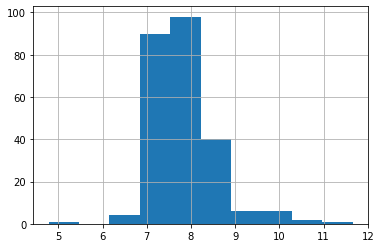

In [87]:
runs["Average Speed (mph)"].hist()

In [88]:
runs["Average Speed (mph)"].skew()

1.1515896592090744

The response variable in this case exibhits strong right (positive) skew. The skew will be tolerated as the model is being designed to understand the natural imbalance that stems from the slower paces that  arise from from runs of longer distances.

#### Max Grade

<AxesSubplot:>

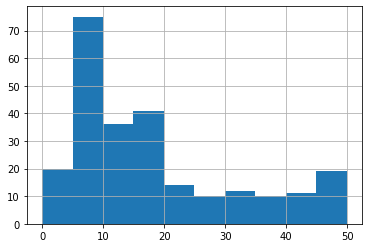

In [89]:
runs["Max Grade"].hist()

#### Average Grade

<AxesSubplot:>

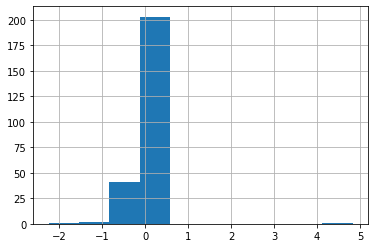

In [90]:
runs["Average Grade"].hist()

#### Average Cadence

<AxesSubplot:>

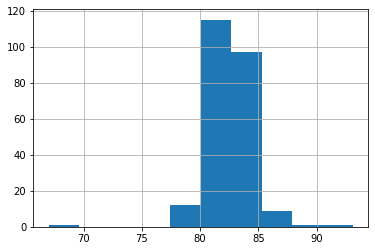

In [91]:
runs["Average Cadence"].hist()

#### Distance (mi)

<AxesSubplot:>

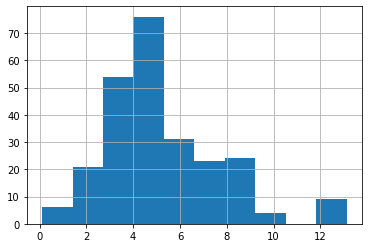

In [92]:
runs["Distance (mi)"].hist()

#### Max Speed (mph)

<AxesSubplot:>

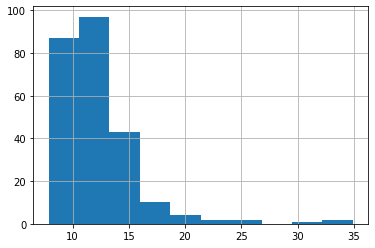

In [93]:
runs["Max Speed (mph)"].hist()

Values above 20 mph are unrealistic and probably an error in data collection from my Garmin watch. High values are being replaced with the median.

In [94]:
median = runs.loc[runs["Max Speed (mph)"] < 20, "Max Speed (mph)"].median()
runs["Max Speed (mph)"] = runs["Max Speed (mph)"].mask(runs["Max Speed (mph)"] > 20, median)

<AxesSubplot:>

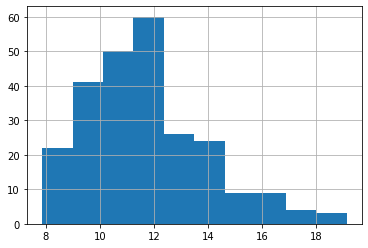

In [95]:
runs["Max Speed (mph)"].hist()

#### Elevation Gain (ft)

<AxesSubplot:>

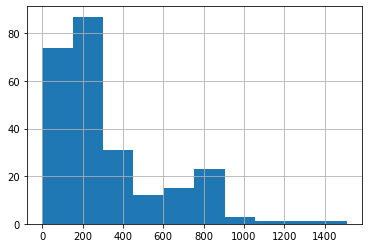

In [96]:
runs["Elevation Gain (ft)"].hist()

#### Elevation Loss (ft)

<AxesSubplot:>

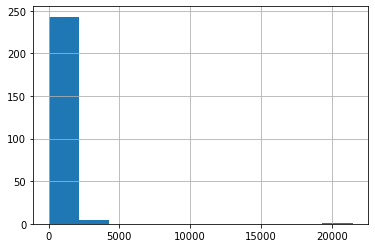

In [97]:
runs["Elevation Loss (ft)"].hist()

#### Elevation Low (ft)

<AxesSubplot:>

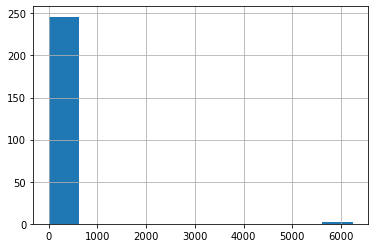

In [98]:
runs["Elevation Low (ft)"].hist()

#### Elevation High (ft)

<AxesSubplot:>

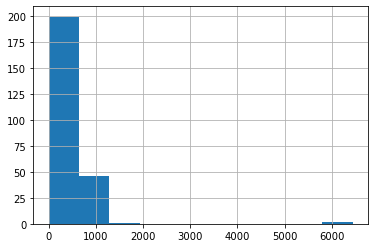

In [99]:
runs["Elevation High (ft)"].hist()

Elevation Low and High both have an outlier. Value will be retained in dataset as high elevation runs are possible. 

#### Hour of Day

<AxesSubplot:>

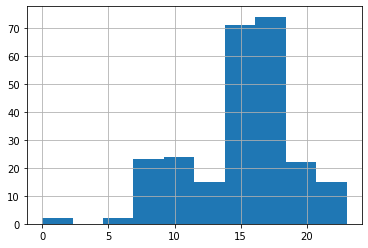

In [100]:
runs["Hour of Day"].hist()

A little bit of bimodality - most of my runs are in the afternoon and evening as seen in the biggest hump on the right. A smaller hump at left represents morning runs which happen with less frequency.

#### Rest Hours

<AxesSubplot:>

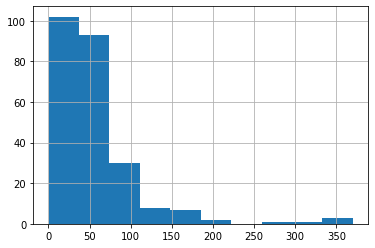

In [101]:
runs["Rest Hours"].hist()

Strong skew present with about 350 hours of rest (~14 days) as the maximum. Values above 168 hours (1 week) will be replaced by the median. Rest hours are being included to examine how my body is bouncing back, but time after 1 week likely stems from injury recovery or designed time off.

In [102]:
median = runs.loc[runs["Rest Hours"] < 168, "Rest Hours"].median()
runs["Rest Hours"] = runs["Rest Hours"].mask(runs["Rest Hours"] > 168, median)

<AxesSubplot:>

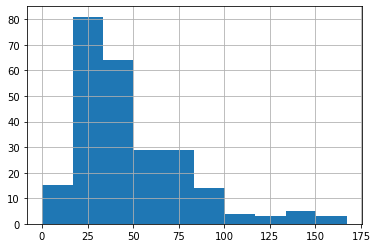

In [103]:
runs["Rest Hours"].hist()

### Checking for Null Values

In [104]:
runs.isnull().sum()

Max Grade               0
Average Grade           0
Average Cadence        12
Distance (mi)           0
Max Speed (mph)         0
Average Speed (mph)     0
Elevation Gain (ft)     0
Elevation Loss (ft)     0
Elevation Low (ft)      0
Elevation High (ft)     0
Hour of Day             0
Rest Hours              1
dtype: int64

### Replacing Null Values with Variable Medians

In [105]:
null_medians = runs[["Average Cadence", "Rest Hours"]].median()
runs[["Average Cadence", "Rest Hours"]] = runs[["Average Cadence", "Rest Hours"]].fillna(null_medians)

In [106]:
runs.isnull().sum()

Max Grade              0
Average Grade          0
Average Cadence        0
Distance (mi)          0
Max Speed (mph)        0
Average Speed (mph)    0
Elevation Gain (ft)    0
Elevation Loss (ft)    0
Elevation Low (ft)     0
Elevation High (ft)    0
Hour of Day            0
Rest Hours             0
dtype: int64

### Correlation

<AxesSubplot:>

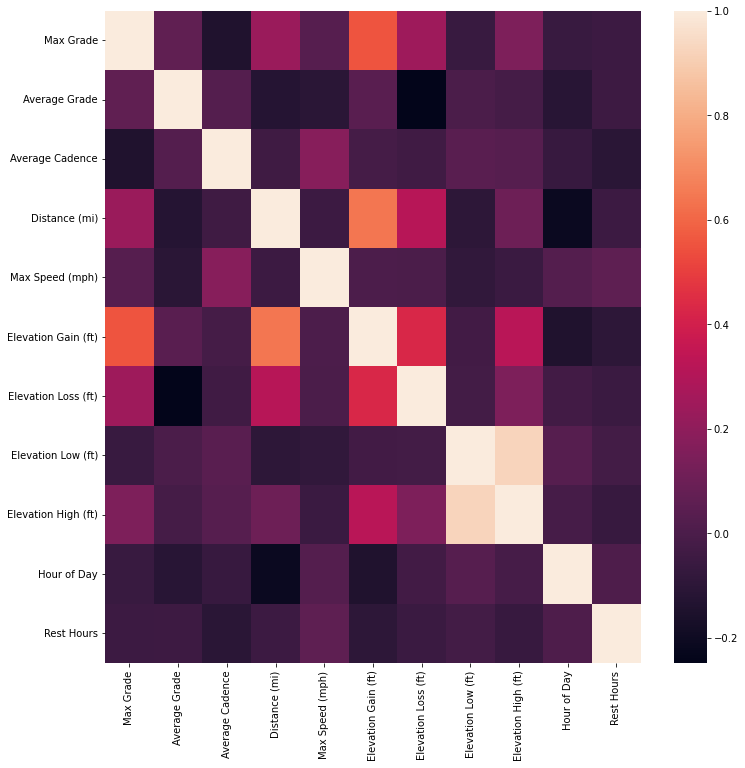

In [107]:
plt.figure(figsize=(12,12))
sns.heatmap(runs.drop(["Average Speed (mph)"], axis=1).corr())

Source: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

Text(0.5, 1.0, 'Features Correlating with Average Speed (mph)')

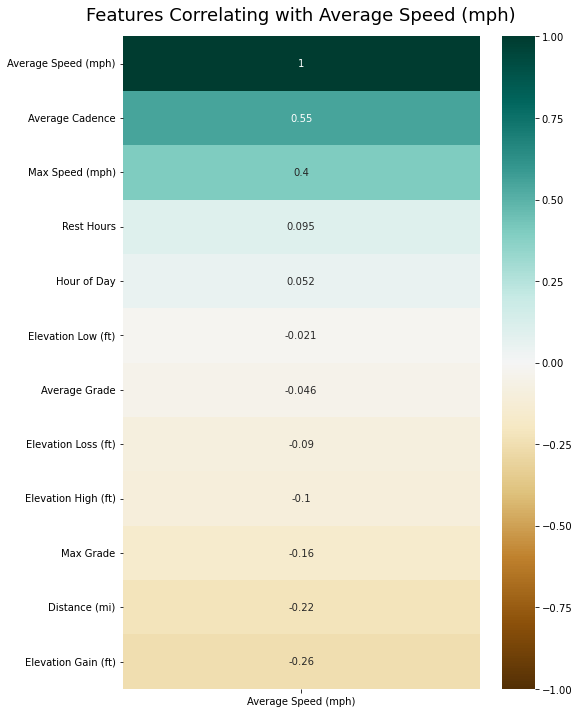

In [108]:
plt.figure(figsize=(8,12))
heatmap = sns.heatmap(runs.corr()[["Average Speed (mph)"]].sort_values(by="Average Speed (mph)", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
heatmap.set_title("Features Correlating with Average Speed (mph)",
                 fontdict={'fontsize': 18}, pad=16)

Average Cadence, Max Speed (mph), Elevation Gain, and Distance (mi) are all reasonably correlated with Average Speed (mph). Since a neural network is being used, multicollinearity won't be checked even though some predictors are correlated with one another.

### Exporting as CSV

In [109]:
runs.to_csv("runs_cleaned.csv", index=False)